# Chapter 06 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example: Toyota Corolla prices

 Load toyota.csv dataset and create a histogram

In [3]:
toyota = pd.read_csv("toyota.txt", header=None)
toyota.columns = ["price"]

 Single resample with replacement

In [4]:
random.seed(123)
sample = random.choices(toyota["price"], k=20)
print(pd.DataFrame({
    "original data": toyota["price"],
    "resample": sample,
}))
print(np.mean(sample))

    original data  resample
0           13500     13750
1           13750     13750
2           13950     21500
3           14950     13950
4           13750     16750
5           12950     13500
6           16900     20950
7           18600     16900
8           21500     17950
9           12950     14950
10          20950     16900
11          19950     16900
12          19600     13750
13          21500     13500
14          22500     21500
15          22000     13750
16          22750     19950
17          17950     13750
18          16750     16900
19          16950     21500
16617.5


 Resampling procedure

In [5]:
random.seed(123)

def resampleMeans(data, nResamples=1000, nSamples=20):
    means = []
    for _ in range(nResamples):
        sample = random.choices(data, k=nSamples)
        means.append(np.mean(sample))
    return means
means = resampleMeans(toyota["price"])
ci_interval = np.percentile(means, [5, 95])
print(ci_interval)

[16356.625 18950.125]


 Histogram of resampled means

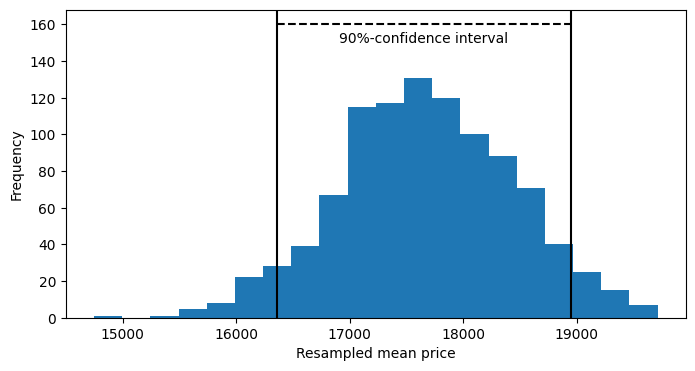

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(means).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Resampled mean price")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [160, 160], color="black", linestyle="--")
ax.text(ci_interval.mean(), 150, "90%-confidence interval", ha="center")
plt.show()

# Normal Distribution

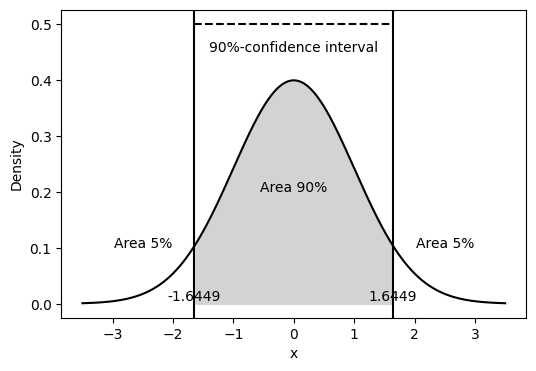

In [7]:
x = np.linspace(-3.5, 3.5, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")

ci_interval = [-1.6449, 1.6449]

mask = (ci_interval[0] < x) & (x < ci_interval[1])
ax.fill_between(x[mask], y[mask], color="lightgrey")

for ci in ci_interval:
    ax.axvline(ci, color="black")
    ax.text(ci, 0.0, f"{ci:.4f}",
            verticalalignment="bottom", horizontalalignment="center")
ax.plot(ci_interval, [0.5, 0.5], color="black", linestyle="--")
ax.text(0, 0.45, "90%-confidence interval", ha="center")


ax.text(-2.5, 0.1, "Area 5%", horizontalalignment="center")
ax.text(2.5, 0.1, "Area 5%", horizontalalignment="center")
ax.text(0, 0.2, "Area 90%", horizontalalignment="center")

ax.set_xlabel("x")
ax.set_ylabel("Density")
plt.show()

 Calculate the standard deviation of the resampled means:

In [8]:
# estimate the standard error from resample means
print(f"standard error of mean (resample): {np.std(means):.1f}")

# estimate the standard error from the data
print(f"standard error of mean (data): {np.std(toyota['price'])/np.sqrt(20):.1f}")

standard error of mean (resample): 772.4
standard error of mean (data): 764.4


# Appendix A: explore changes in initial guess

In [9]:
random.seed(1)
def get_ci_interval(ratio_positive):
    box = [1]*int(200*ratio_positive) + [0]*int(200*(1-ratio_positive))
    proportion = []
    for _ in range(2000):
        sample = random.choices(box, k=200)
        proportion.append(100 * sum(sample) / len(sample))
    ci_interval = np.percentile(proportion, [5, 95])
    return ci_interval
percent_positives = np.linspace(30, 40, 21)
ci_intervals = [get_ci_interval(percent_positive / 100)
                for percent_positive in percent_positives]

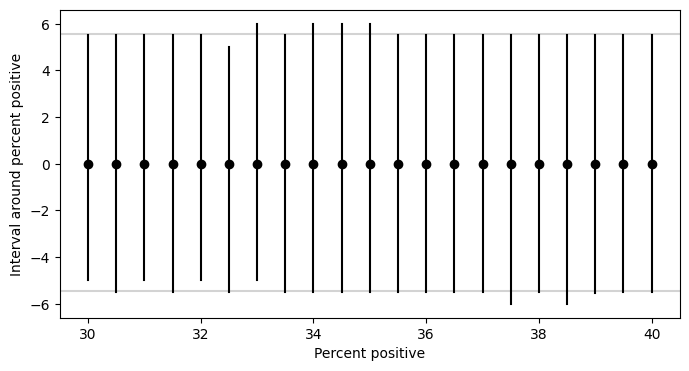

In [10]:
df = pd.DataFrame(ci_intervals, columns=["lower", "upper"],
index=percent_positives)
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(np.mean(df["lower"] - percent_positives), color="lightgrey")
ax.axhline(np.mean(df["upper"] - percent_positives), color="lightgrey")
for percent, ci_interval in df.iterrows():
    ax.plot([percent, percent], ci_interval - percent, color="black")
ax.scatter(percent_positives, [0] * len(percent_positives), color="black")
ax.set_xlabel("Percent positive")
ax.set_ylabel("Interval around percent positive")
plt.show()

# Appendix B: Parametric Bootstrap

 Example of a parametric resample

In [11]:
rng = np.random.default_rng(seed=123)
sample = toyota["price"]
df = pd.DataFrame({
    "original data": toyota["price"],
    "resample": stats.norm.rvs(loc=np.mean(sample), scale=np.std(sample), size=len(sample),
                               random_state=rng),
})
print(df.round(1))
print(df.mean(axis=0))

    original data  resample
0           13500   14303.7
1           13750   16427.7
2           13950   22087.7
3           14950   18348.1
4           13750   20830.8
5           12950   19657.8
6           16900   15509.3
7           18600   19537.6
8           21500   16602.7
9           12950   16582.9
10          20950   18017.2
11          19950   12468.7
12          19600   21760.4
13          21500   15390.9
14          22500   21104.4
15          22000   18151.0
16          22750   22922.2
17          17950   15428.9
18          16750   16619.1
19          16950   18839.6
original data    17685.000000
resample         18029.540449
dtype: float64


 Define function that uses parametric bootstrap to create samples

In [12]:
def get_resampled_means_parametric(sample, num_resamples=1000, seed=None):
    rng = np.random.default_rng(seed=seed)
    norm = stats.norm(loc=np.mean(sample), scale=np.std(sample))
    resampled_means = []
    for _ in range(num_resamples):
        resample = norm.rvs(size=len(sample), random_state=rng)
        resampled_means.append(np.mean(resample))
    return resampled_means
means = get_resampled_means_parametric(toyota["price"], num_resamples=1000, seed=123)
ci_interval = np.percentile(means, [5, 95])
print("mean: ", np.mean(means))
print("90% confidence interval: ", ci_interval)

mean:  17703.640478318073
90% confidence interval:  [16438.41170551 18966.16314393]


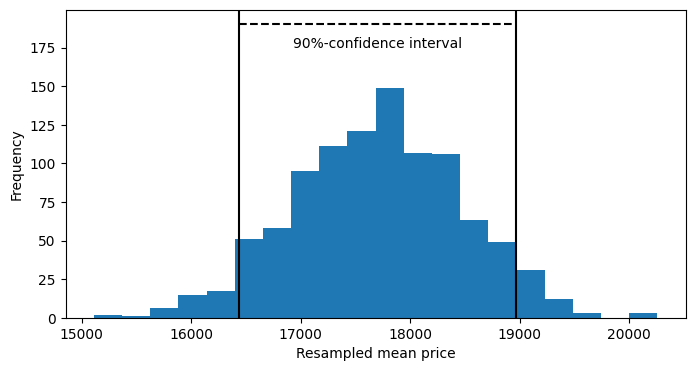

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(means).plot.hist(bins=20, ax=ax)
ax.set_xlabel("Resampled mean price")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [190, 190], color="black", linestyle="--")
ax.text(ci_interval.mean(), 175, "90%-confidence interval", ha="center")
plt.show()